In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ademo\AppData\Local\Temp\ipykernel_18412\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Loan_default.csv")

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [5]:
data.describe(include="object").transpose()

,count,unique,top,freq
LoanID,255347,255347,I38PQUQS96,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


<Axes: >

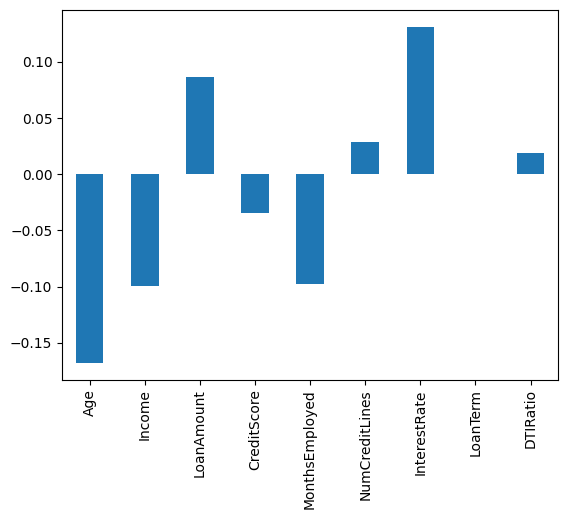

In [6]:
data.corr(numeric_only=True)["Default"].drop("Default").plot(kind="bar")

In [7]:
data.drop("LoanID", axis=1, inplace=True)

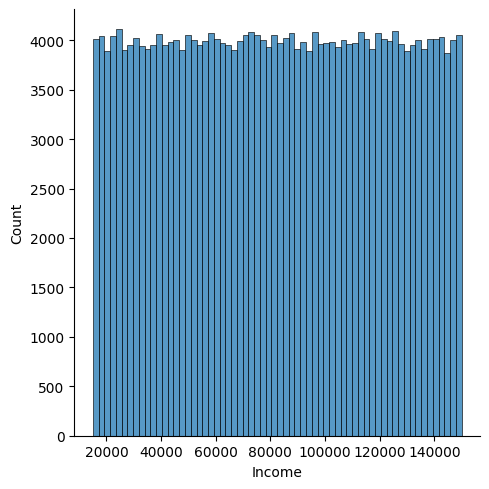

In [8]:
sns.displot(data=data, x="Income")

In [55]:
X = pd.get_dummies(data.drop("Default", axis=1), drop_first=True, dtype="int")
y = data["Default"]

In [10]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0


In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [57]:
Random_under_sample = RandomUnderSampler(sampling_strategy=0.4, random_state=101)

In [58]:
X,y = Random_under_sample.fit_resample(X,y)

In [59]:
over_sample = SMOTE(sampling_strategy="auto", random_state=101)

In [60]:
X,y = over_sample.fit_resample(X,y)

# Now using Randaom Forest

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Split the data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

### Standardize the features

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create a Random forest Model

In [64]:
rfc_model = RandomForestClassifier()

In [65]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred = rfc_model.predict(X_test)

### import Metrics

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     22138
           1       0.85      0.73      0.78     22342

    accuracy                           0.80     44480
   macro avg       0.81      0.80      0.80     44480
weighted avg       0.81      0.80      0.80     44480



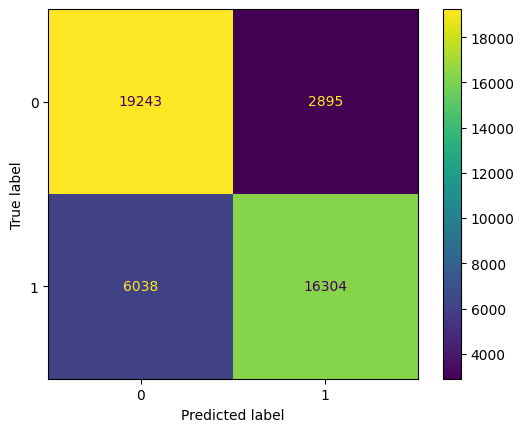

In [24]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

# Create model

In [25]:
def general_model(model_instance):
    model = model_instance()
    model.fit(X_train,y_train)
    y_prediction = model.predict(X_test)
    print(classification_report(y_test,y_prediction))
    cm = confusion_matrix(y_test,y_prediction)
    dist = ConfusionMatrixDisplay(cm)
    dist.plot()

In [26]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     22138
           1       0.86      0.71      0.78     22342

    accuracy                           0.80     44480
   macro avg       0.80      0.80      0.79     44480
weighted avg       0.81      0.80      0.79     44480



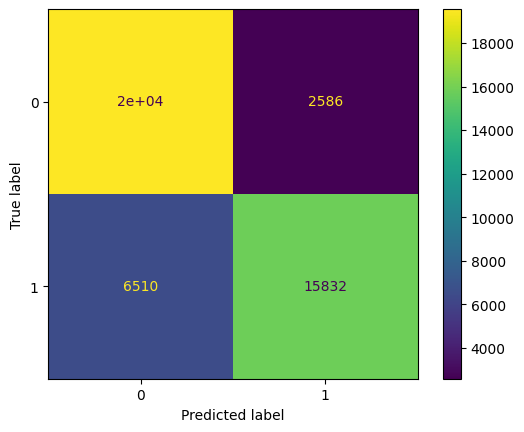

In [27]:
general_model(SVC)

# Using Tensorflow

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X1 = X.values
y1 = y.values

In [30]:
y1.shape

(148264,)

In [31]:
X1.shape

(148264, 24)

In [32]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [34]:
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [35]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stoping = EarlyStopping(patience=3, verbose=1)

In [38]:
model.fit(X1_train, y1_train, epochs=50, validation_data=(X1_test,y1_test), callbacks=[early_stoping])

Epoch 1/50
3244/3244 [==============================] - 8s 2ms/step - loss: 0.4924 - accuracy: 0.7622 - val_loss: 0.4425 - val_accuracy: 0.7886
Epoch 2/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4624 - accuracy: 0.7837 - val_loss: 0.4356 - val_accuracy: 0.7895
Epoch 3/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4566 - accuracy: 0.7852 - val_loss: 0.4331 - val_accuracy: 0.7928
Epoch 4/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4539 - accuracy: 0.7868 - val_loss: 0.4401 - val_accuracy: 0.7923
Epoch 5/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4514 - accuracy: 0.7892 - val_loss: 0.4300 - val_accuracy: 0.7941
Epoch 6/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4507 - accuracy: 0.7887 - val_loss: 0.4285 - val_accuracy: 0.7938
Epoch 7/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4484 - accuracy: 0.7893 - val_loss: 0.4283 - val_accuracy:

In [39]:
metrics = pd.DataFrame(model.history.history)

In [40]:
losses= metrics[["loss", "val_loss"]]

<Axes: >

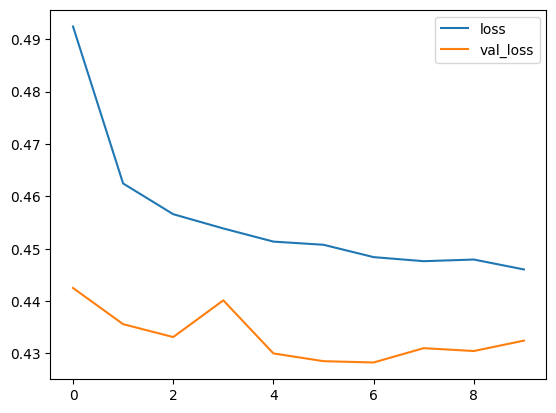

In [41]:
losses.plot()

In [50]:
y_pred1 = (model.predict(X1_test)>0.5).astype(np.int64)

   1/1390 [..............................] - ETA: 22s

1390/1390 [==============================] - 1s 840us/step


In [51]:
y_pred1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [52]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     22138
           1       0.84      0.74      0.79     22342

    accuracy                           0.80     44480
   macro avg       0.80      0.80      0.80     44480
weighted avg       0.80      0.80      0.80     44480



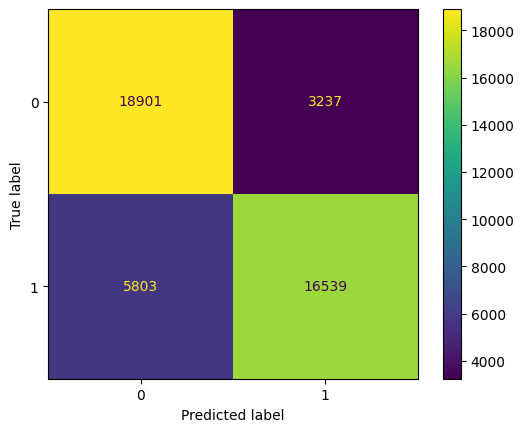

In [53]:
cm = confusion_matrix(y1_test,y_pred1)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [54]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
}

In [71]:
grid_search_model = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [72]:
grid_search_model.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [74]:

y_pred2 = grid_search_model.predict(X_test)


In [78]:
grid_search_model.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

In [76]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81     22138
           1       0.85      0.74      0.79     22342

    accuracy                           0.80     44480
   macro avg       0.81      0.80      0.80     44480
weighted avg       0.81      0.80      0.80     44480



In [79]:
cm = confusion_matrix(y_test,y_pred2)

In [80]:
display2 = ConfusionMatrixDisplay(cm)

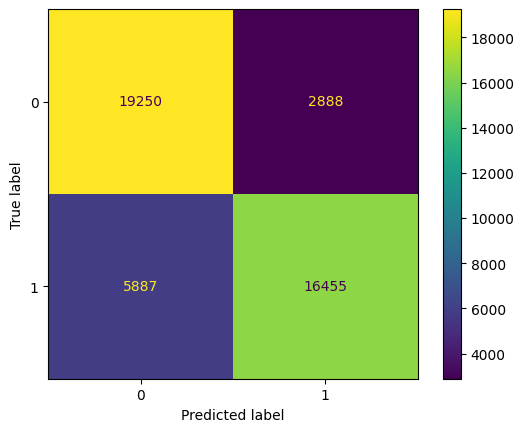

In [81]:
display2.plot()